In [3]:
import pandas as pd

# Replace the path with your actual file path
file_path = r'C:\Users\Adarsh\Desktop\retail_sales_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head(10))

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  24-11-2023     CUST001    Male   34           Beauty   
1               2  27-02-2023     CUST002  Female   26         Clothing   
2               3  13-01-2023     CUST003    Male   50      Electronics   
3               4  21-05-2023     CUST004    Male   37         Clothing   
4               5  06-05-2023     CUST005    Male   30           Beauty   
5               6  25-04-2023     CUST006  Female   45           Beauty   
6               7  13-03-2023     CUST007    Male   46         Clothing   
7               8  22-02-2023     CUST008    Male   30      Electronics   
8               9  13-12-2023     CUST009    Male   63      Electronics   
9              10  07-10-2023     CUST010  Female   52         Clothing   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30 

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Convert categorical variables to numerical values
df['Product Category'] = df['Product Category'].astype('category').cat.codes
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [6]:
# Select relevant columns
data = df[['Age', 'Product Category', 'Gender']]

In [7]:
df.head(10)

Transaction ID        Date Customer ID  Gender  Age  Product Category  \
0               1  24-11-2023     CUST001       0   34                 0   
1               2  27-02-2023     CUST002       1   26                 1   
2               3  13-01-2023     CUST003       0   50                 2   
3               4  21-05-2023     CUST004       0   37                 1   
4               5  06-05-2023     CUST005       0   30                 0   
5               6  25-04-2023     CUST006       1   45                 0   
6               7  13-03-2023     CUST007       0   46                 1   
7               8  22-02-2023     CUST008       0   30                 2   
8               9  13-12-2023     CUST009       0   63                 2   
9              10  07-10-2023     CUST010       1   52                 1   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
5         1              30            30  
6         2              25            50  
7         4              25           100  
8         2             300           600  
9         4              50           200

In [8]:
df.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

In [9]:
#Standarizing the data for clustering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [10]:
data_scaled

array([[-0.54056476, -1.28596236, -1.02020406],
       [-1.12559156, -0.04348665,  0.98019606],
       [ 0.62948884,  1.19898906, -1.02020406],
       ...,
       [-1.34497661, -1.28596236,  0.98019606],
       [-0.39430806,  1.19898906,  0.98019606],
       [ 0.41010379,  1.19898906, -1.02020406]])

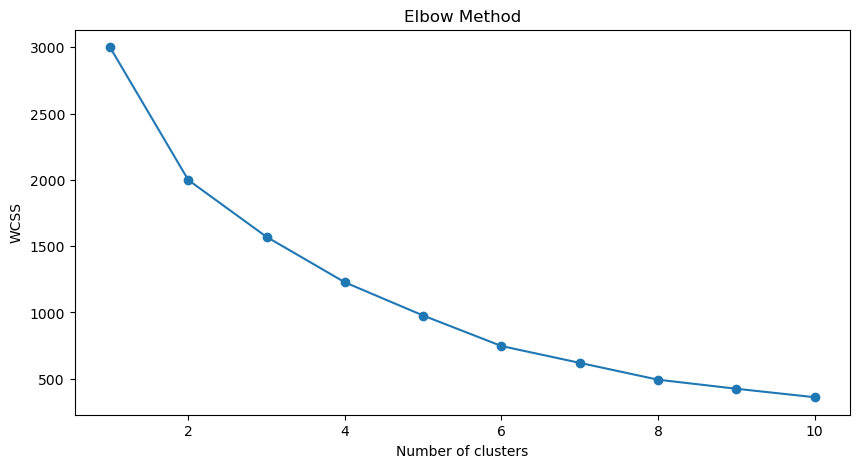

In [11]:
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [12]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters


In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming `data_scaled` is the scaled data used for KMeans
# Assuming `scaler` is the StandardScaler used for scaling

# Fit the KMeans model
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

# Get the cluster centers in scaled form
scaled_centroids = kmeans.cluster_centers_

# Convert the centroids back to the original scale
original_centroids = scaler.inverse_transform(scaled_centroids)

# Create a DataFrame for better visualization
centroids_df = pd.DataFrame(original_centroids, columns=data.columns)
centroids_df['Cluster'] = range(1, len(centroids_df) + 1)

print("Descaled Centroids:")
print(centroids_df)


Descaled Centroids:
         Age  Product Category        Gender  Cluster
0  40.371336     -6.661338e-16  5.407166e-01        1
1  41.848138      1.492837e+00 -3.330669e-16        2
2  41.840116      1.494186e+00  1.000000e+00        3


In [19]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming `data_scaled` is the scaled data used for KMeans
# Assuming `scaler` is the StandardScaler used for scaling

# Fit the KMeans model
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

# Get the cluster centers in scaled form
scaled_centroids = kmeans.cluster_centers_

# Convert the centroids back to the original scale
original_centroids = scaler.inverse_transform(scaled_centroids)

# Create a DataFrame for better visualization
centroids_df = pd.DataFrame(original_centroids, columns=data.columns)
centroids_df['Cluster'] = range(1, len(centroids_df) + 1)

# Set pandas to display numbers in standard decimal format (no scientific notation)
pd.set_option('display.float_format', '{:.6f}'.format)

print("Descaled Centroids:")
print(centroids_df)


Descaled Centroids:
        Age  Product Category    Gender  Cluster
0 40.371336         -0.000000  0.540717        1
1 41.848138          1.492837 -0.000000        2
2 41.840116          1.494186  1.000000        3


In [16]:
import pandas as pd

# Assuming `df` is your original DataFrame and clusters have already been assigned
# Add cluster labels to the DataFrame (if not already added)
df['Cluster'] = clusters



print(df)


     Transaction ID        Date Customer ID  Gender  Age  Product Category  \
0                 1  24-11-2023     CUST001       0   34                 0   
1                 2  27-02-2023     CUST002       1   26                 1   
2                 3  13-01-2023     CUST003       0   50                 2   
3                 4  21-05-2023     CUST004       0   37                 1   
4                 5  06-05-2023     CUST005       0   30                 0   
..              ...         ...         ...     ...  ...               ...   
995             996  16-05-2023     CUST996       0   62                 1   
996             997  17-11-2023     CUST997       0   52                 0   
997             998  29-10-2023     CUST998       1   23                 0   
998             999  05-12-2023     CUST999       1   36                 2   
999            1000  12-04-2023    CUST1000       0   47                 2   

     Quantity  Price per Unit  Total Amount  Cluster  
0       

In [17]:
import pandas as pd

# Save the DataFrame to an Excel file dynamically
df.to_excel("customer_segments_with_clusters1.xlsx", index=False)

print("DataFrame saved successfully as 'customer_segments_with_clusters.xlsx'")


DataFrame saved successfully as 'customer_segments_with_clusters.xlsx'


In [13]:
# Count the number of data points in each cluster
cluster_counts = df['Cluster'].value_counts()

# Print the count of values within each cluster
print("Number of values within each cluster:")
print(cluster_counts)


Number of values within each cluster:
Cluster
1    349
2    344
0    307
Name: count, dtype: int64


# Age and Total Spending without and with centroids


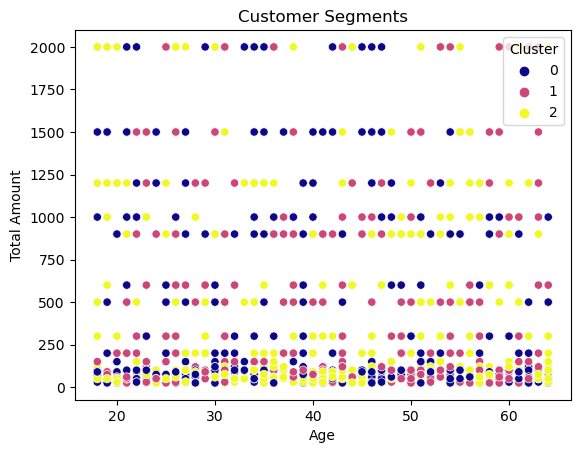

In [10]:
sns.scatterplot(x='Age', y='Total Amount', hue='Cluster', data=df, palette='plasma')
plt.title('Customer Segments')
plt.show()

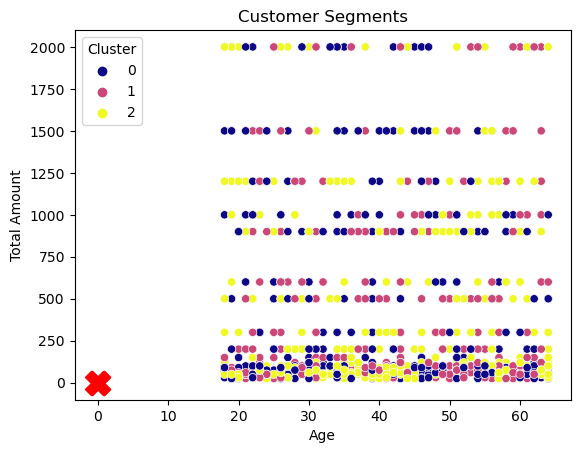

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the centroids
centroids = kmeans.cluster_centers_

# Create the scatter plot
sns.scatterplot(x='Age', y='Total Amount', hue='Cluster', data=df, palette='plasma')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

# Add title and legend
plt.title('Customer Segments')
plt.show()


# Gender and Total Spending with and without centroids

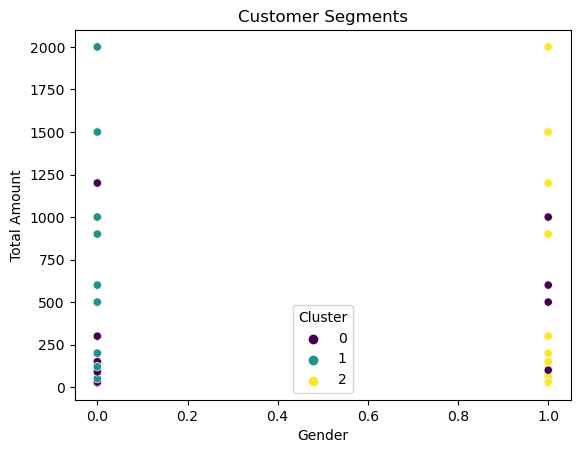

In [12]:
sns.scatterplot(x='Gender', y='Total Amount', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segments')
plt.show()

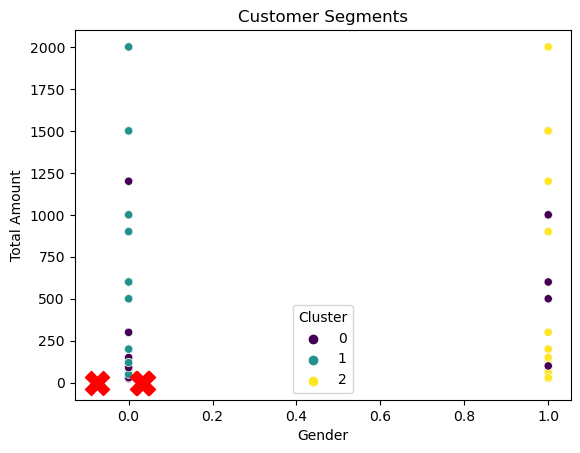

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the centroids
centroids = kmeans.cluster_centers_

# Create the scatter plot
sns.scatterplot(x='Gender', y='Total Amount', hue='Cluster', data=df, palette='viridis')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

# Add title and legend
plt.title('Customer Segments')
plt.show()


# Product Category and Total Spending

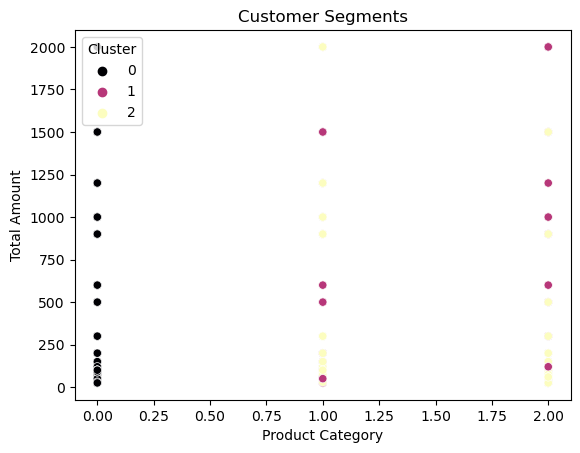

In [14]:
sns.scatterplot(x='Product Category', y='Total Amount', hue='Cluster', data=df, palette='magma')
plt.title('Customer Segments')
plt.show()



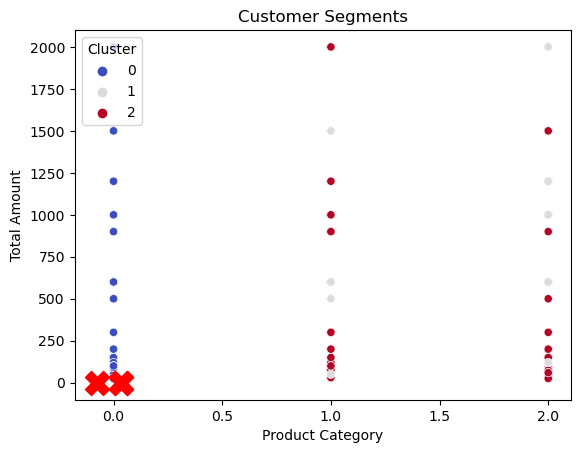

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the centroids
centroids = kmeans.cluster_centers_

# Create the scatter plot
sns.scatterplot(x='Product Category', y='Total Amount', hue='Cluster', data=df, palette='coolwarm')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

# Add title and legend
plt.title('Customer Segments')
plt.show()


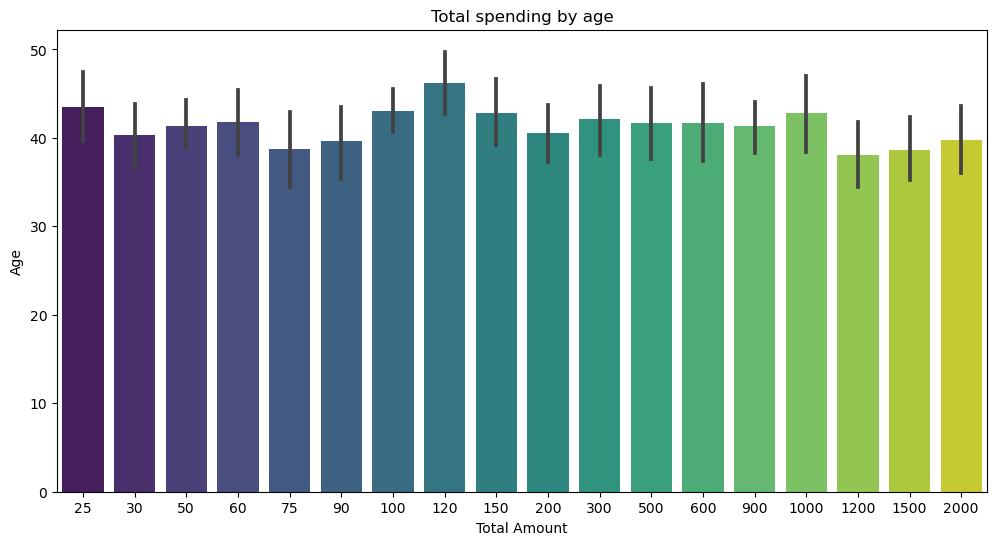

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Amount', y='Age', data=df, palette='viridis')

# Add title and labels
plt.title('Total spending by age')
plt.xlabel('Total Amount')
plt.ylabel('Age')

# Show the plot
plt.show()


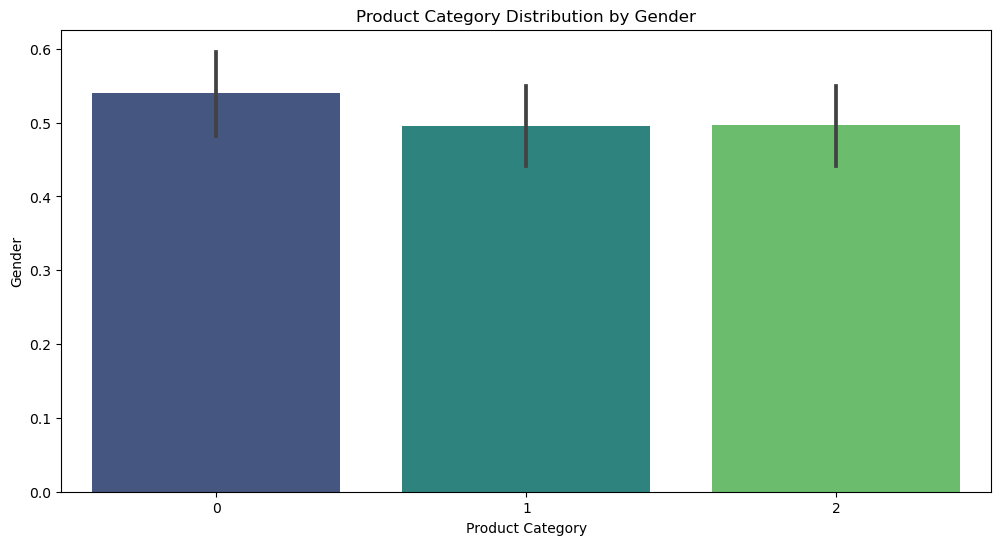

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Category', y='Gender', data=df, palette='viridis')

# Add title and labels
plt.title('Product Category Distribution by Gender')
plt.xlabel('Product Category')
plt.ylabel('Gender')

# Show the plot
plt.show()


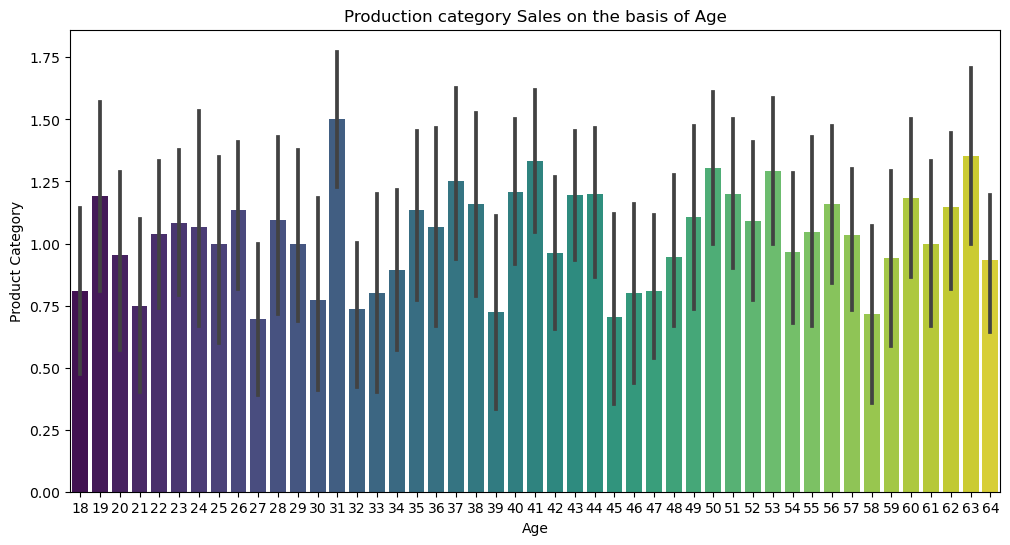

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Product Category', data=df, palette='viridis')

# Add title and labels
plt.title('Production category Sales on the basis of Age')
plt.xlabel('Age')
plt.ylabel('Product Category')

# Show the plot
plt.show()


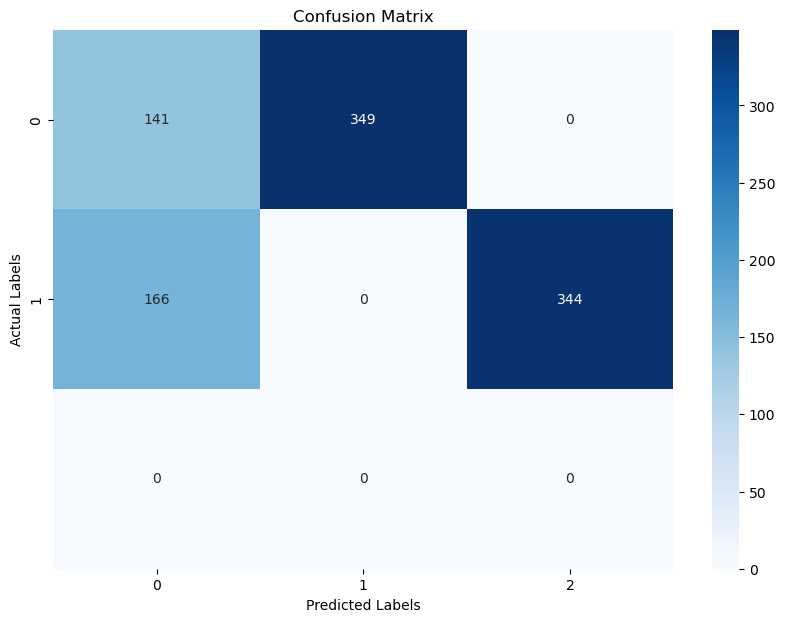

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Actual labels (ground truth) and predicted labels (from k-means)
# These should be the actual class labels and the predicted cluster labels respectively
actual_labels = df['Gender']  # Replace with your actual labels
predicted_labels = df['Cluster']    # Predicted cluster labels from k-means

# Calculate confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(predicted_labels), yticklabels=np.unique(actual_labels))
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()



In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming X is your feature dataset
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(data)

# Calculate the silhouette score
sil_score = silhouette_score(data, labels)
print(f"Silhouette Score: {sil_score:.2f}")


Silhouette Score: 0.58


In [21]:
# Calculate the Calinski-Harabasz Index
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
calinski_harabasz = calinski_harabasz_score(data, labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")

Calinski-Harabasz Index: 3901.57


In [22]:
# Calculate the Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(data, labels)
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")


Davies-Bouldin Index: 0.52


In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
from sklearn.decomposition import PCA

# Perform PCA to reduce the data to 3 dimensions
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled)

# Create a DataFrame with the PCA results and the cluster labels
pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = df['Cluster']


In [24]:
# Calculate the proportion of variance explained by each component
explained_variance = pca.explained_variance_ratio_

# Print the explained variance for each component
for i, variance in enumerate(explained_variance, 1):
    print(f'Principal Component {i}: {variance:.2f} ({variance * 100:.2f}%)')


Principal Component 1: 0.35 (35.12%)
Principal Component 2: 0.33 (33.25%)
Principal Component 3: 0.32 (31.64%)


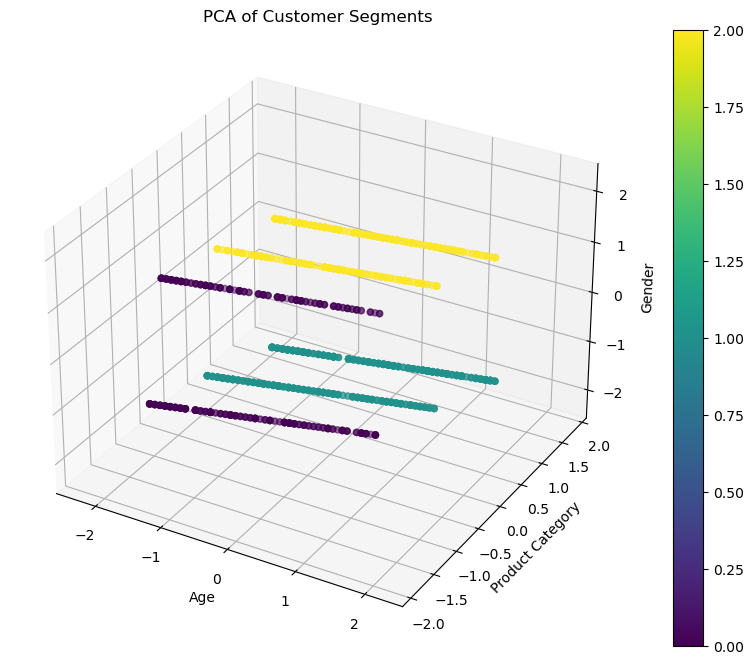

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the PCA components
sc = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Cluster'], cmap='viridis')

# Add labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Product Category')
ax.set_zlabel('Gender')
plt.title('PCA of Customer Segments')
plt.colorbar(sc)
plt.show()


In [27]:
data_pca

array([[-0.70178275, -1.13165871, -1.10162395],
       [-1.09879196, -0.00625239,  1.01106325],
       [ 1.6592293 , -0.34357972,  0.05965234],
       ...,
       [-2.08369033, -0.15907162,  0.23743724],
       [ 0.15995713,  0.48427522,  1.51450625],
       [ 1.5418647 , -0.48831188,  0.17544506]])

In [28]:
# Calculate the Silhouette Score
silhouette = silhouette_score(data_pca, df['Cluster'])

# Calculate the Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(data_pca, df['Cluster'])

# Calculate the Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(data_pca, df['Cluster'])

# Print the results
print(f'Silhouette Score: {silhouette:.2f}')
print(f'Calinski-Harabasz Index: {calinski_harabasz:.2f}')
print(f'Davies-Bouldin Index: {davies_bouldin:.2f}')


Silhouette Score: 0.34
Calinski-Harabasz Index: 454.03
Davies-Bouldin Index: 1.19


In [29]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
from sklearn.manifold import TSNE

# Perform t-SNE to reduce the data to 3 dimensions
tsne = TSNE(n_components=3, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

# Create a DataFrame with the t-SNE results and the cluster labels
tsne_df = pd.DataFrame(data_tsne, columns=['TSNE1', 'TSNE2', 'TSNE3'])
tsne_df['Cluster'] = df['Cluster']


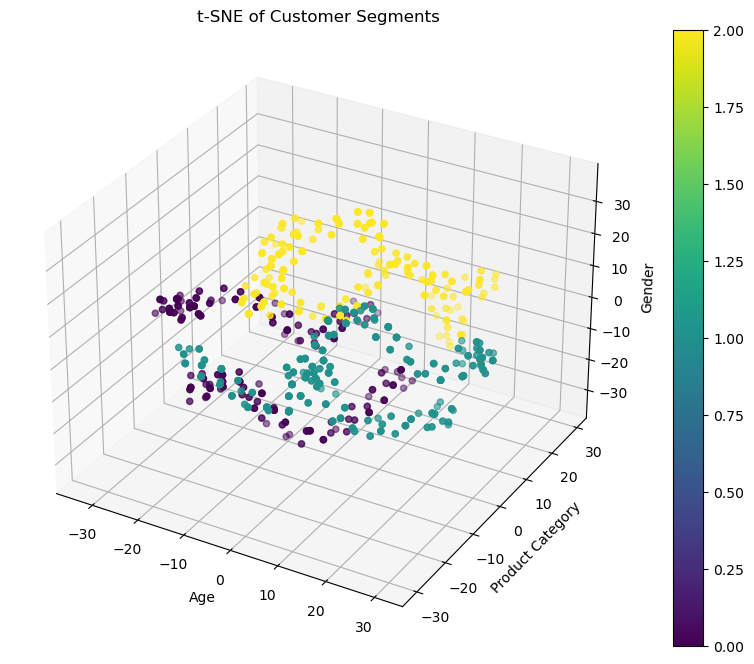

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the t-SNE components
sc = ax.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], tsne_df['TSNE3'], c=tsne_df['Cluster'], cmap='viridis')

# Add labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Product Category')
ax.set_zlabel('Gender')
plt.title('t-SNE of Customer Segments')
plt.colorbar(sc)
plt.show()


In [34]:
# Calculate the Silhouette Score
silhouette = silhouette_score(data_tsne, df['Cluster'])

# Calculate the Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(data_tsne, df['Cluster'])

# Calculate the Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(data_tsne, df['Cluster'])

# Print the results
print(f'Silhouette Score: {silhouette:.2f}')
print(f'Calinski-Harabasz Index: {calinski_harabasz:.2f}')
print(f'Davies-Bouldin Index: {davies_bouldin:.2f}')


Silhouette Score: 0.25
Calinski-Harabasz Index: 305.77
Davies-Bouldin Index: 1.48


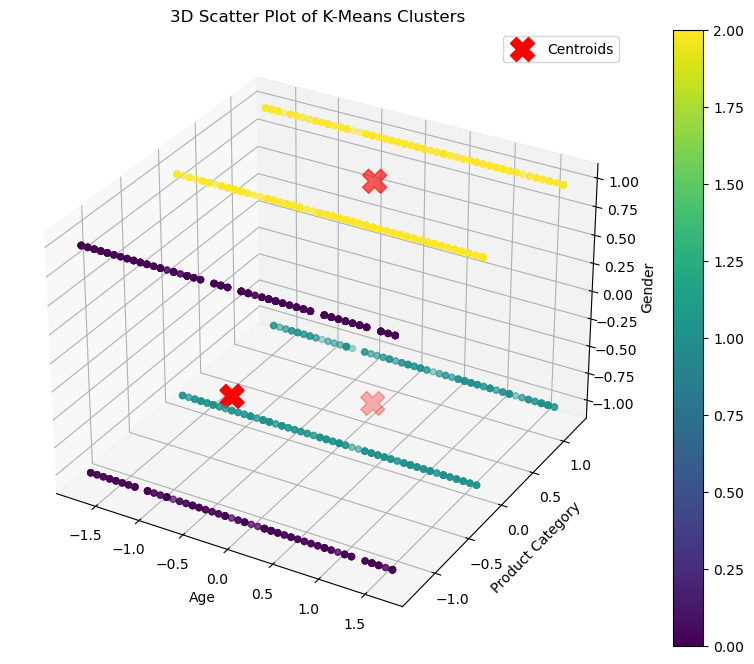

In [18]:
# Assuming your standardized data is in data_scaled and cluster labels are in df['Cluster']
# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the 3 components
sc = ax.scatter(data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2], c=df['Cluster'], cmap='viridis')

# Plot the centroids
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=300, c='red', marker='X', label='Centroids')

# Add labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Product Category')
ax.set_zlabel('Gender')
plt.title('3D Scatter Plot of K-Means Clusters')
plt.legend()
plt.colorbar(sc)
plt.show()
